In [33]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# import lazypredict

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

import statsmodels.tsa.stattools as st
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [34]:
df_ger = pd.read_csv('Data/Brazil.csv',  index_col='Year')
df_ger # the one with categorical variable for Germany

Country ISO 3166-1 alpha-3       Total       Coal         Oil        Gas
Year                                                                         
1980  Brazil                BRA  185.471117  19.986728  150.210064   1.883259
1981  Brazil                BRA  170.613975  19.723312  135.527696   1.685440
1982  Brazil                BRA  170.811520  21.551648  133.193728   2.381600
1983  Brazil                BRA  165.348839  23.926447  125.740255   3.378282
1984  Brazil                BRA  167.076404  28.996896  122.062496   4.169632
1985  Brazil                BRA  179.589112  34.870994  127.517108   4.994133
1986  Brazil                BRA  196.613291  35.123104  142.375712   5.986976
1987  Brazil                BRA  205.332593  40.234384  145.541408   6.639168
1988  Brazil                BRA  207.069970  39.776384  147.651872   6.840688
1989  Brazil                BRA  211.444880  39.930272  151.579680   7.306016
1990  Brazil                BRA  218.658000  37.094715  151.775296   7.483989
1991  Brazil                BRA  229.394000  42.466107  156.700232   7.335661
1992  Brazil                BRA  233.601000  41.203075  163.251665   7.983260
1993  Brazil                BRA  244.306000  42.342610  171.252419   8.729970
1994  Brazil                BRA  254.002000  43.666838  179.161864   8.985299
1995  Brazil                BRA  268.678000  45.582308  190.346969   9.602722
1996  Brazil                BRA  289.311000  46.468484  206.281426  10.608090
1997  Brazil                BRA  306.949000  47.044057  219.832627  11.863316
1998  Brazil                BRA  317.359000  45.590741  229.578140  12.411119
1999  Brazil                BRA  327.256000  46.804688  235.468487  14.068825
2000  Brazil                BRA  340.183000  50.460434  239.488193  18.442373
2001  Brazil                BRA  346.166000  49.426704  241.794706  23.185590
2002  Brazil                BRA  347.765000  48.688815  239.219326  29.292858
2003  Brazil                BRA  344.645000  51.933112  232.433668  30.919220
2004  Brazil                BRA  361.434000  53.832656  239.768252  38.215091
2005  Brazil                BRA  364.371000  50.948421  240.221198  39.619381
2006  Brazil                BRA  368.871000  50.837875  242.248571  42.052554
2007  Brazil                BRA  390.573000  54.989055  256.003342  43.245603
2008  Brazil                BRA  412.638000  55.315497  267.238809  51.302693
2009  Brazil                BRA  389.775000  43.586053  262.705409  40.958538
2010  Brazil                BRA  440.269000  56.688185  286.079991  55.048824
2011  Brazil                BRA  462.580000  62.292401  303.885017  53.100582
2012  Brazil                BRA  498.309000  61.016471  327.733969  63.396560
2013  Brazil                BRA  532.418000  65.604089  342.338124  74.703787
2014  Brazil                BRA  557.901000  69.033897  356.753378  81.285725
2015  Brazil                BRA  529.353000  69.451663  330.358576  80.464761
2016  Brazil                BRA  492.748000  63.831218  312.939113  69.665669
2017  Brazil                BRA  497.412678  67.321878  316.425222  70.687790
2018  Brazil                BRA  477.102130  65.840737  300.605153  67.417072
2019  Brazil                BRA  475.104581  61.887745  302.333585  67.121321
2020  Brazil                BRA  442.306003  56.240806  281.089414  59.026096
2021  Brazil                BRA  488.881070  68.229888  296.986854  75.974385

In [35]:
# Drop the categorial variables
df= df_ger.select_dtypes(include=['float64'])
df

Total       Coal         Oil        Gas
Year                                              
1980  185.471117  19.986728  150.210064   1.883259
1981  170.613975  19.723312  135.527696   1.685440
1982  170.811520  21.551648  133.193728   2.381600
1983  165.348839  23.926447  125.740255   3.378282
1984  167.076404  28.996896  122.062496   4.169632
1985  179.589112  34.870994  127.517108   4.994133
1986  196.613291  35.123104  142.375712   5.986976
1987  205.332593  40.234384  145.541408   6.639168
1988  207.069970  39.776384  147.651872   6.840688
1989  211.444880  39.930272  151.579680   7.306016
1990  218.658000  37.094715  151.775296   7.483989
1991  229.394000  42.466107  156.700232   7.335661
1992  233.601000  41.203075  163.251665   7.983260
1993  244.306000  42.342610  171.252419   8.729970
1994  254.002000  43.666838  179.161864   8.985299
1995  268.678000  45.582308  190.346969   9.602722
1996  289.311000  46.468484  206.281426  10.608090
1997  306.949000  47.044057  219.832627  11.863316
1998  317.359000  45.590741  229.578140  12.411119
1999  327.256000  46.804688  235.468487  14.068825
2000  340.183000  50.460434  239.488193  18.442373
2001  346.166000  49.426704  241.794706  23.185590
2002  347.765000  48.688815  239.219326  29.292858
2003  344.645000  51.933112  232.433668  30.919220
2004  361.434000  53.832656  239.768252  38.215091
2005  364.371000  50.948421  240.221198  39.619381
2006  368.871000  50.837875  242.248571  42.052554
2007  390.573000  54.989055  256.003342  43.245603
2008  412.638000  55.315497  267.238809  51.302693
2009  389.775000  43.586053  262.705409  40.958538
2010  440.269000  56.688185  286.079991  55.048824
2011  462.580000  62.292401  303.885017  53.100582
2012  498.309000  61.016471  327.733969  63.396560
2013  532.418000  65.604089  342.338124  74.703787
2014  557.901000  69.033897  356.753378  81.285725
2015  529.353000  69.451663  330.358576  80.464761
2016  492.748000  63.831218  312.939113  69.665669
2017  497.412678  67.321878  316.425222  70.687790
2018  477.102130  65.840737  300.605153  67.417072
2019  475.104581  61.887745  302.333585  67.121321
2020  442.306003  56.240806  281.089414  59.026096
2021  488.881070  68.229888  296.986854  75.974385

In [36]:
#  plot to see total emission versus year for 'Germany'
fig_ger = px.line(df, x=df.index, y="Total")
fig_ger.update_xaxes(rangeslider_visible=True)
fig_ger.show()

Visualize the time series

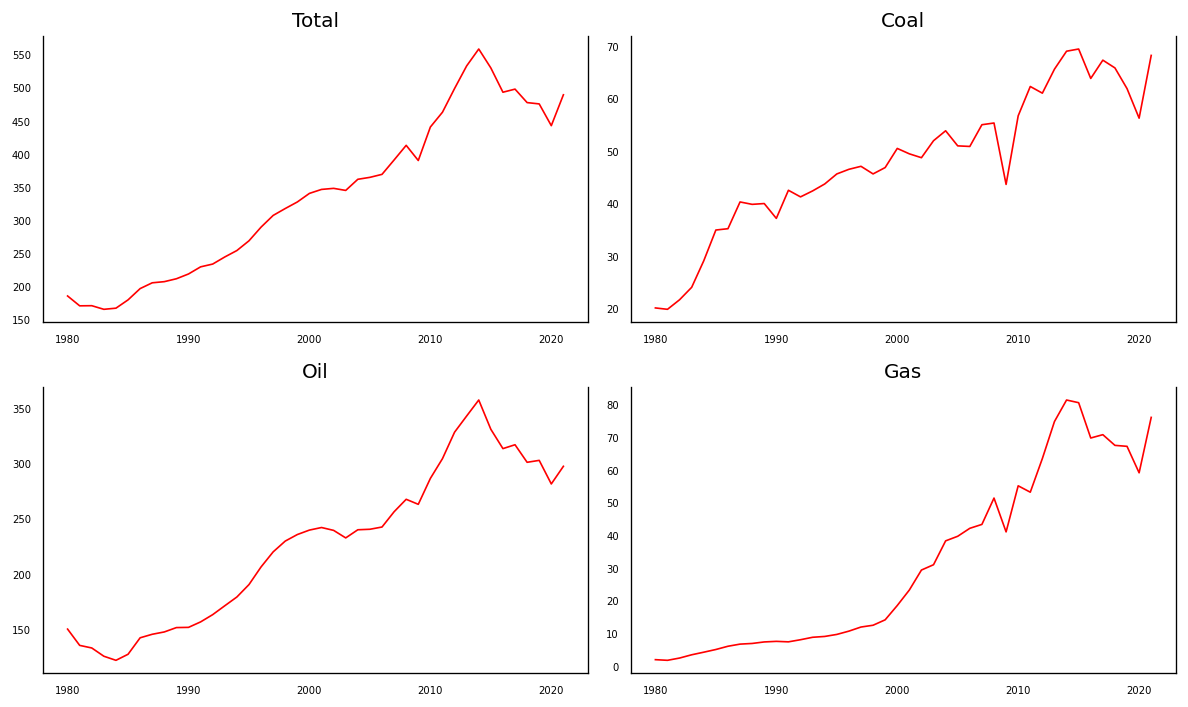

In [37]:
# Plot
fig, axes = plt.subplots(nrows=2, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

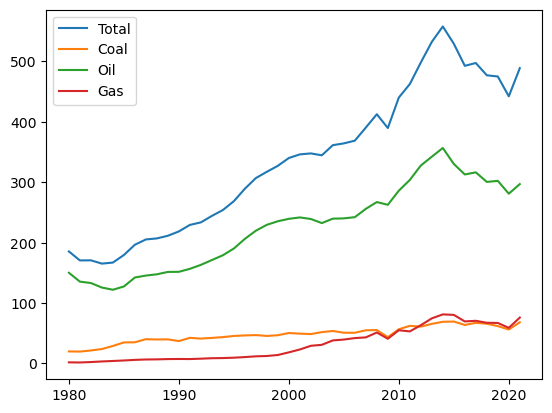

In [38]:
plt.figure()

x = df.index
y1 = df['Total']
y2 = df['Coal']
y3 = df['Oil']
y4 = df['Gas']






plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)




plt.legend(['Total', 'Coal', 'Oil', 'Gas'])

Grainger's Causality Test

In [39]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)   

Total_x  Coal_x  Oil_x  Gas_x
Total_y      1.0     0.0    0.0    0.0
Coal_y       0.0     1.0    0.0    0.0
Oil_y        0.0     0.0    1.0    0.0
Gas_y        0.0     0.0    0.0    1.0

 Cointegration Test

In [40]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Total  ::  88.1      > 40.1749   =>   True
Coal   ::  43.68     > 24.2761   =>   True
Oil    ::  11.59     > 12.3212   =>   False
Gas    ::  0.05      > 4.1296    =>   False


Split the Series into Training and Testing Data

In [41]:
nobs = 5
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)  
print(df_test.shape) 

(37, 4)
(5, 4)


Check for Stationarity and Make the Time Series Stationary

In [42]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [43]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Total" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.8764
 No. Lags Chosen       = 5
 Critical value 1%     = -3.661
 Critical value 5%     = -2.961
 Critical value 10%    = -2.619
 => P-Value = 0.9928. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Coal" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.5922
 No. Lags Chosen       = 2
 Critical value 1%     = -3.639
 Critical value 5%     = -2.951
 Critical value 10%    = -2.614
 => P-Value = 0.4875. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Oil" 
    -----------------------------------------------
 Null Hypothesis: Data has unit roo

In [44]:
# The ADF test confirms none of the time series is stationary. Let’s difference all of them once and check again.
# 1st difference
df_differenced = df_train.diff().dropna()

In [45]:
# Re-run ADF test on each differenced series.
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')
    ### result: all the time series became stationary ###

    Augmented Dickey-Fuller Test on "Total" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.7978
 No. Lags Chosen       = 4
 Critical value 1%     = -3.661
 Critical value 5%     = -2.961
 Critical value 10%    = -2.619
 => P-Value = 0.0029. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Coal" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.1263
 No. Lags Chosen       = 1
 Critical value 1%     = -3.639
 Critical value 5%     = -2.951
 Critical value 10%    = -2.614
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Oil" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.

In [46]:
# Second Differencing
df_differenced = df_differenced.diff().dropna()

In [47]:
# ADF Test on each column of 2nd Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Total" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.6588
 No. Lags Chosen       = 5
 Critical value 1%     = -3.679
 Critical value 5%     = -2.968
 Critical value 10%    = -2.623
 => P-Value = 0.0814. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Coal" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.764
 No. Lags Chosen       = 6
 Critical value 1%     = -3.689
 Critical value 5%     = -2.972
 Critical value 10%    = -2.625
 => P-Value = 0.0033. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Oil" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Si

How to Select the Order (P) of VAR model

In [48]:
# To select the right order of the VAR model, we iteratively fit increasing orders of VAR model and pick the order that gives a model with least AIC.
# Though the usual practice is to look at the AIC, you can also check other best fit comparison estimates of BIC, FPE and HQIC.

model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  12.64097590319675
BIC :  13.538835035323904
FPE :  311628.9759578341
HQIC:  12.947171581113501 

Lag Order = 2
AIC :  12.456165211023512
BIC :  14.08871891444149
FPE :  271796.84720564896
HQIC:  13.005469859913013 

Lag Order = 3
AIC :  11.834531313924957
BIC :  14.216352155974512
FPE :  168286.86910026163
HQIC:  12.624037537445375 

Lag Order = 4
AIC :  10.512446093103874
BIC :  13.657966412619679
FPE :  63191.43470184773
HQIC:  11.537807284801646 

Lag Order = 5
AIC :  9.389043829705718
BIC :  13.312396498359753
FPE :  45590.199595766375
HQIC:  10.644158057634353 

Lag Order = 6
AIC :  7.591708739901941
BIC :  12.306521946751852
FPE :  66563.77286393792
HQIC:  9.068329415165238 

Lag Order = 7
AIC :  -239.00428495725794
BIC :  -233.4851519865321
FPE :  4.234648055042373e-101
HQIC:  -237.31703098562494 

Lag Order = 8
AIC :  -240.36041357340844
BIC :  -234.02521111738727
FPE :  2.3246832313226455e-105
HQIC:  -238.47662576973474 

Lag Order = 9
AIC :  -240.09313126

In [49]:
# An alternate method to choose the order(p) of the VAR models is to use the model.select_order(maxlags) method.
#x = model.select_order(maxlags=6)
#x.summary()

We choose p = 2 as the number of lags (AIC is locally minimum at p=2)

Train the VAR Model of Selected Order(p)

In [50]:
p=2
model_fitted = model.fit(p)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 02, Mar, 2023
Time:                     09:59:41
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    14.0887
Nobs:                     33.0000    HQIC:                   13.0055
Log likelihood:          -356.827    FPE:                    271797.
AIC:                      12.4562    Det(Omega_mle):         103586.
--------------------------------------------------------------------
Results for equation Total
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const           -0.248609         2.807313           -0.089           0.929
L1.Total         0.068717         1.199333            0.057           0.954
L1.Coal         -0.432063         1.111128           -0.389           0.697
L1.O

Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic. Results close to 2 is alright.

In [51]:
from statsmodels.stats.stattools import durbin_watson

def adjust(val, length= 6): return str(val).ljust(length)
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(adjust(col), ':', round(val, 2))

Total  : 1.89
Coal   : 2.03
Oil    : 2.11
Gas    : 1.66


How to Forecast VAR model using statsmodels

In [52]:
df_differenced

Total       Coal        Oil        Gas
Year                                            
1982  15.054687   2.091752  12.348400   0.893979
1983  -5.660226   0.546463  -5.119505   0.300522
1984   7.190246   2.695650   3.775714  -0.205332
1985  10.785143   0.803649   9.132371   0.033151
1986   4.511471  -5.621988   9.403992   0.168342
1987  -8.304877   4.859170 -11.692908  -0.340651
1988  -6.981925  -5.569280  -1.055232  -0.450672
1989   2.637533   0.611888   1.817344   0.263808
1990   2.838210  -2.989445  -3.732192  -0.287355
1991   3.522880   8.206949   4.729320  -0.326301
1992  -6.529000  -6.634424   1.626497   0.795927
1993   6.498000   2.402567   1.449321   0.099111
1994  -1.009000   0.184693  -0.091309  -0.491381
1995   4.980000   0.591242   3.275660   0.362094
1996   5.957000  -1.029294   4.749352   0.387945
1997  -2.995000  -0.310603  -2.383256   0.249858
1998  -7.228000  -2.028889  -3.805688  -0.707423
1999  -0.513000   2.667263  -3.855166   1.109903
2000   3.030000   2.441799  -1.870641   2.715842
2001  -6.944000  -4.689476  -1.713193   0.369669
2002  -4.384000   0.295841  -4.881893   1.364051
2003  -4.719000   3.982186  -4.210278  -4.480906
2004  19.909000  -1.344753  14.120242   5.669509
2005 -13.852000  -4.783779  -6.881638  -5.891581
2006   1.563000   2.773689   1.574427   1.028883
2007  17.202000   4.261726  11.727398  -1.240124
2008   0.363000  -3.824738  -2.519304   6.864041
2009 -44.928000 -12.055886 -15.768867 -18.401245
2010  73.357000  24.831576  27.907982  24.434441
2011 -28.183000  -7.497916  -5.569556 -16.038528
2012  13.418000  -6.880146   6.043926  12.244220
2013  -1.620000   5.863548  -9.244797   1.011249
2014  -8.626000  -1.157810  -0.188901  -4.725289
2015 -54.031000  -3.012042 -40.810056  -7.402902
2016  -8.057000  -6.038211   8.975339  -9.978128

In [53]:
# In order to forecast, the VAR model expects up to the lag order number of observations from the past data.
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input # the output is the values of total, coal, oil and gas for 2015 and 2016 (this depends on the train test split and lag_order)

2


array([[-54.031   ,  -3.012042, -40.810056,  -7.402902],
       [ -8.057   ,  -6.038211,   8.975339,  -9.978128]])

In [54]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs) # nobs is from test train split ratio
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

Total_2d    Coal_2d    Oil_2d     Gas_2d
Year                                           
2017  50.114190  20.787989  9.270341  20.231339
2018 -45.016508 -18.921834 -6.409791 -21.417646
2019  21.726665   5.898955  0.945499  16.733061
2020 -13.005568   1.288193 -3.281430 -12.673897
2021  21.412963   2.620720  8.755737  11.791613

Invert the transformation to get the real forecast

In [55]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [56]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results.loc[:, ['Total_forecast', 'Coal_forecast', 'Oil_forecast','Gas_forecast']]

Total_forecast  Coal_forecast  Oil_forecast  Gas_forecast
Year                                                           
2017      506.257190      78.998762    304.789991     79.097916
2018      474.749872      75.244472    290.231079     67.112518
2019      464.969218      77.389136    276.617664     71.860180
2020      442.182997      80.821994    259.722820     63.933945
2021      440.809739      86.875572    251.583713     67.799324

In [57]:
df_test

Total       Coal         Oil        Gas
Year                                              
2017  497.412678  67.321878  316.425222  70.687790
2018  477.102130  65.840737  300.605153  67.417072
2019  475.104581  61.887745  302.333585  67.121321
2020  442.306003  56.240806  281.089414  59.026096
2021  488.881070  68.229888  296.986854  75.974385

Plot of Forecast vs Actuals

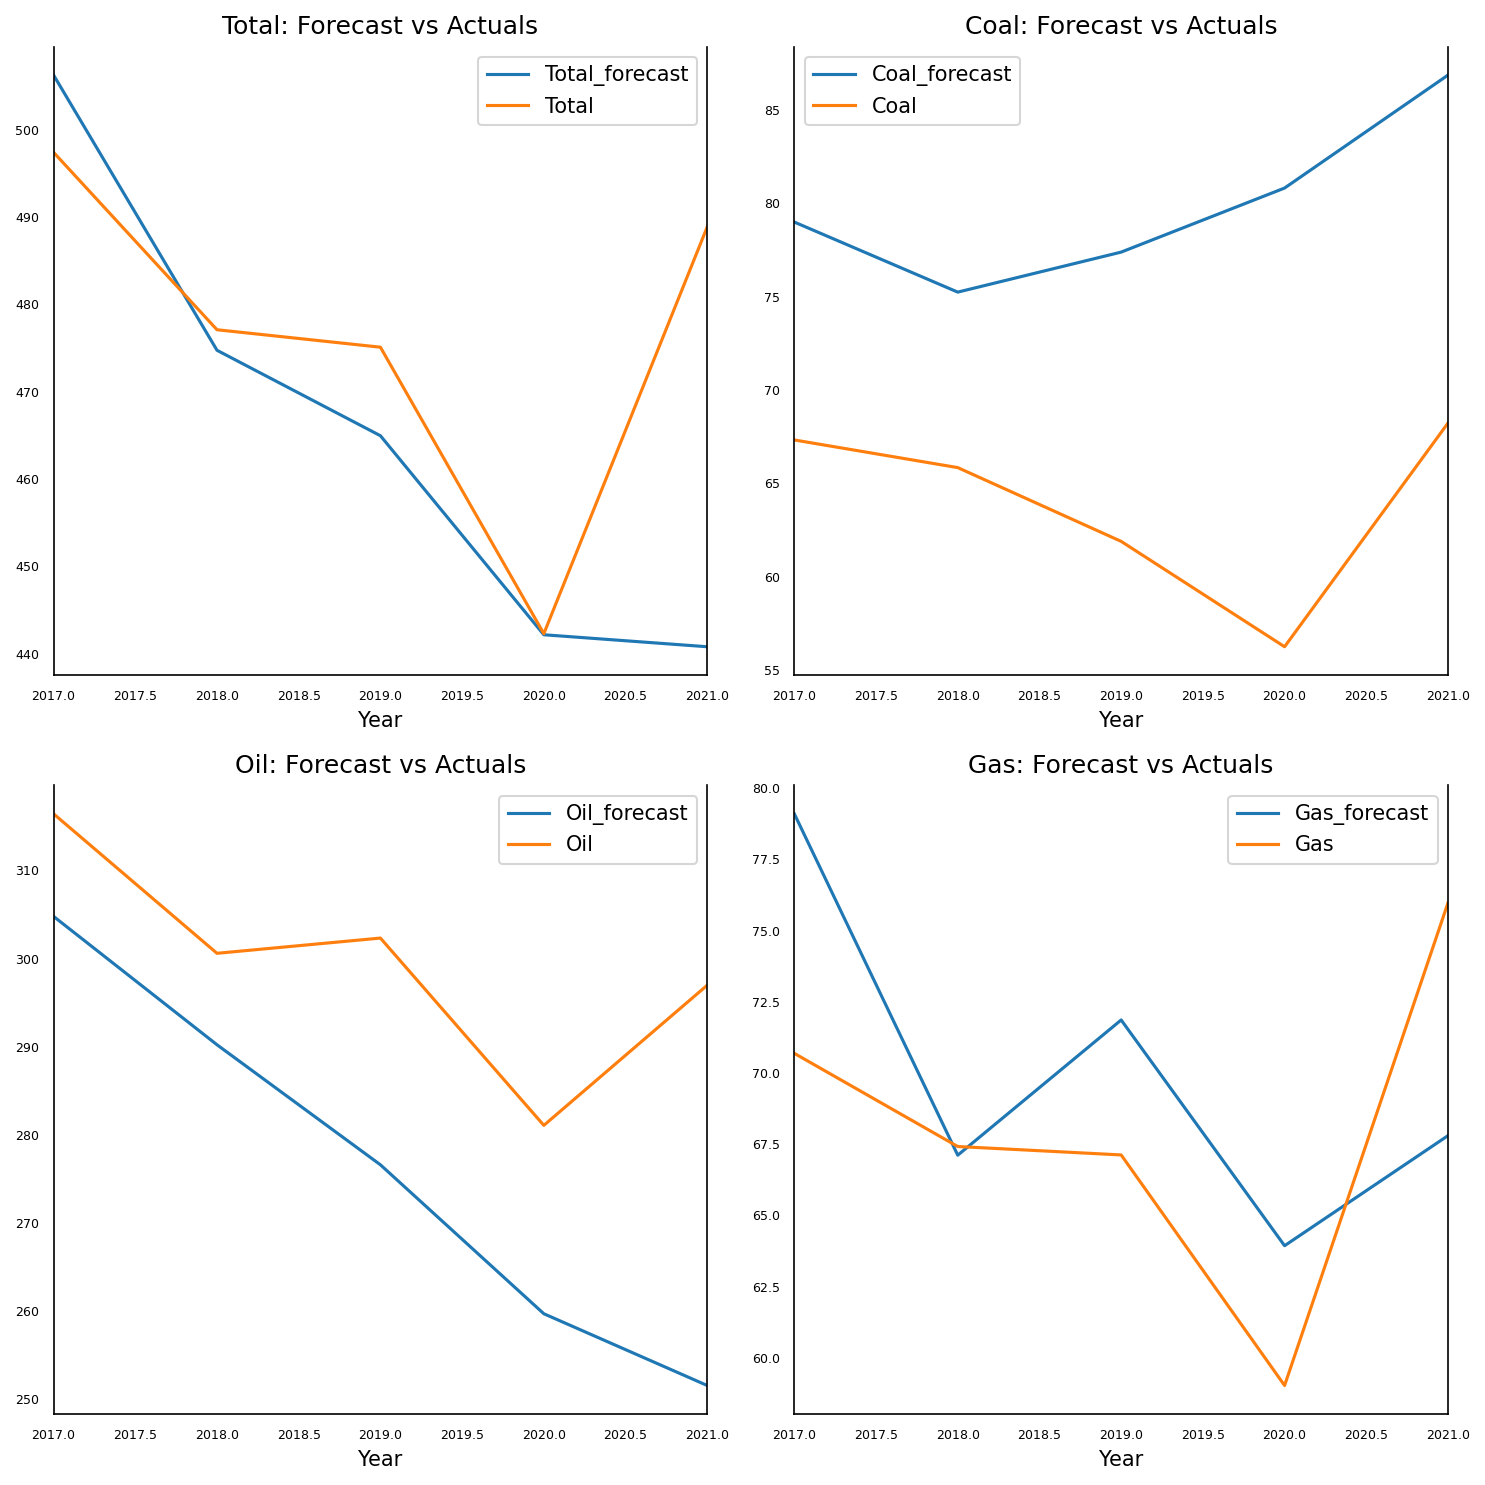

In [58]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

Evaluate the Forecasts

In [59]:
# To evaluate the forecasts, let’s compute a comprehensive set of metrics, namely, the MAPE, ME, MAE, MPE, RMSE, corr and minmax.
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: Total')
accuracy_prod = forecast_accuracy(df_results['Total_forecast'].values, df_test['Total'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: Coal')
accuracy_prod = forecast_accuracy(df_results['Coal_forecast'].values, df_test['Coal'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: Oil')
accuracy_prod = forecast_accuracy(df_results['Oil_forecast'].values, df_test['Oil'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: Gas')
accuracy_prod = forecast_accuracy(df_results['Gas_forecast'].values, df_test['Gas'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))


Forecast Accuracy of: Total
mape   :  0.0285
me     :  -10.3675
mae    :  13.9053
mpe    :  -0.0214
rmse   :  22.3488
corr   :  0.5976
minmax :  0.0285

Forecast Accuracy of: Coal
mape   :  0.2554
me     :  15.9618
mae    :  15.9618
mpe    :  0.2554
rmse   :  16.8343
corr   :  0.1845
minmax :  0.1984

Forecast Accuracy of: Oil
mape   :  0.077
me     :  -22.899
mae    :  22.899
mpe    :  -0.077
rmse   :  26.1621
corr   :  0.7864
minmax :  0.077

Forecast Accuracy of: Gas
mape   :  0.077
me     :  1.9154
mae    :  5.3073
mpe    :  0.0321
rmse   :  6.0696
corr   :  0.4261
minmax :  0.0722


Forecasting the future: for 2 years (since p=2)

In [60]:
df_differenced_all = df.diff().dropna()

In [61]:
df_differenced_all

Total       Coal        Oil        Gas
Year                                            
1981 -14.857142  -0.263416 -14.682368  -0.197819
1982   0.197545   1.828336  -2.333968   0.696160
1983  -5.462681   2.374799  -7.453473   0.996682
1984   1.727565   5.070449  -3.677759   0.791350
1985  12.512708   5.874098   5.454612   0.824501
1986  17.024179   0.252110  14.858604   0.992843
1987   8.719302   5.111280   3.165696   0.652192
1988   1.737377  -0.458000   2.110464   0.201520
1989   4.374910   0.153888   3.927808   0.465328
1990   7.213120  -2.835557   0.195616   0.177973
1991  10.736000   5.371392   4.924936  -0.148328
1992   4.207000  -1.263032   6.551433   0.647599
1993  10.705000   1.139535   8.000754   0.746710
1994   9.696000   1.324228   7.909445   0.255329
1995  14.676000   1.915470  11.185105   0.617423
1996  20.633000   0.886176  15.934457   1.005368
1997  17.638000   0.575573  13.551201   1.255226
1998  10.410000  -1.453316   9.745513   0.547803
1999   9.897000   1.213947   5.890347   1.657706
2000  12.927000   3.655746   4.019706   4.373548
2001   5.983000  -1.033730   2.306513   4.743217
2002   1.599000  -0.737889  -2.575380   6.107268
2003  -3.120000   3.244297  -6.785658   1.626362
2004  16.789000   1.899544   7.334584   7.295871
2005   2.937000  -2.884235   0.452946   1.404290
2006   4.500000  -0.110546   2.027373   2.433173
2007  21.702000   4.151180  13.754771   1.193049
2008  22.065000   0.326442  11.235467   8.057090
2009 -22.863000 -11.729444  -4.533400 -10.344155
2010  50.494000  13.102132  23.374582  14.090286
2011  22.311000   5.604216  17.805026  -1.948242
2012  35.729000  -1.275930  23.848952  10.295978
2013  34.109000   4.587618  14.604155  11.307227
2014  25.483000   3.429808  14.415254   6.581938
2015 -28.548000   0.417766 -26.394802  -0.820964
2016 -36.605000  -5.620445 -17.419463 -10.799092
2017   4.664678   3.490660   3.486109   1.022121
2018 -20.310548  -1.481141 -15.820069  -3.270718
2019  -1.997549  -3.952992   1.728432  -0.295751
2020 -32.798578  -5.646939 -21.244171  -8.095225
2021  46.575067  11.989082  15.897440  16.948289

In [62]:
forecast_input_all = df_differenced_all.values[-lag_order:]
forecast_input_all # the output is the values of total, coal, oil and gas for 2015 and 2016 (this depends on the train test split and lag_order)

array([[-32.798578,  -5.646939, -21.244171,  -8.095225],
       [ 46.575067,  11.989082,  15.89744 ,  16.948289]])

In [63]:
model_all = VAR(df_differenced_all)
model_fitted_all = model_all.fit(p)
model_fitted_all.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 02, Mar, 2023
Time:                     09:59:41
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    13.3239
Nobs:                     39.0000    HQIC:                   12.3392
Log likelihood:          -415.226    FPE:                    136235.
AIC:                      11.7883    Det(Omega_mle):         59371.9
--------------------------------------------------------------------
Results for equation Total
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            7.113317         3.316980            2.145           0.032
L1.Total         1.513045         1.608489            0.941           0.347
L1.Coal         -1.157426         1.497652           -0.773           0.440
L1.O

In [64]:
# Forecast

fc_all = model_fitted_all.forecast(y=forecast_input_all, steps=nobs) # nobs is from test train split ratio
df_forecast_all = pd.DataFrame(fc_all, index=[2022,2023,2024,2025,2026], columns=df.columns + '_2d')
df_forecast_all

Total_2d   Coal_2d    Oil_2d    Gas_2d
2022 -19.512317 -2.455983 -9.974684 -7.796797
2023  10.385911  0.258481  5.500269  6.161774
2024 -10.821642 -0.918001 -7.098856 -4.095772
2025  20.456466  4.430930  8.952414  6.654622
2026  -4.564259 -0.850016 -1.847869 -2.845988